In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
from keras.applications import ResNet50
import keras
from keras import layers
from keras.applications import EfficientNetB0

data_dir = "flower_photos"
batch_size = 32
img_height = 180
img_width = 180
num_classes = 5 

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # For multi-class classification
    subset='training'
)

validation_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [9]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [10]:
def build_model():
    inputs = layers.Input(shape=(img_width, img_height, 3))
    base_model = ResNet50(include_top=False, input_tensor=inputs, weights="imagenet")
    base_model.trainable = False  

    x = layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    model = keras.Model(inputs, outputs, name="ResNet50")
    model.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

c:\Users\koval\DataAnalysisLab3\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 79s 798ms/step - accuracy: 0.3492 - loss: 1.5914 - val_accuracy: 0.2927 - val_loss: 1.5935 - learning_rate: 0.0010
Epoch 2/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 67s 726ms/step - accuracy: 0.4498 - loss: 1.3758 - val_accuracy: 0.3653 - val_loss: 1.4969 - learning_rate: 0.0010
Epoch 3/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 66s 717ms/step - accuracy: 0.4902 - loss: 1.3057 - val_accuracy: 0.3912 - val_loss: 1.4369 - learning_rate: 0.0010
Epoch 4/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 66s 721ms/step - accuracy: 0.4923 - loss: 1.2758 - val_accuracy: 0.4432 - val_loss: 1.3519 - learning_rate: 0.0010
Epoch 5/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 66s 717ms/step - accuracy: 0.5124 - loss: 1.2527 - val_accuracy: 0.5157 - val_loss: 1.3055 - learning_rate: 0.0010
Epoch 6/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 68s 736ms/step - accuracy: 0.5008 - loss: 1.2508 - val_accuracy: 0.5349 - val_loss: 1.2141 - learning_rate: 0.0010
Epoch 7/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 68s 739ms/step - accuracy: 0.5275 - loss: 1.

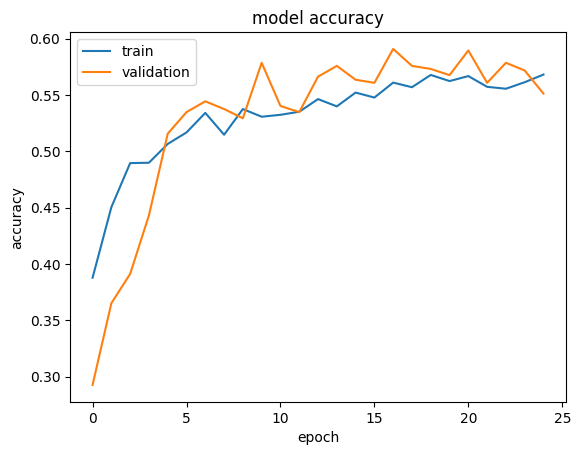

In [11]:
model = build_model()
epochs = 25
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
hist = model.fit(train_data, epochs=epochs, validation_data=validation_data, callbacks=[reduce_lr])
plot_hist(hist)

Epoch 1/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 97s 980ms/step - accuracy: 0.5657 - loss: 1.1614 - val_accuracy: 0.2927 - val_loss: 2.4524 - learning_rate: 1.0000e-05
Epoch 2/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 90s 976ms/step - accuracy: 0.5852 - loss: 1.0930 - val_accuracy: 0.3297 - val_loss: 6.3746 - learning_rate: 1.0000e-05
Epoch 3/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 88s 951ms/step - accuracy: 0.5696 - loss: 1.1065 - val_accuracy: 0.4432 - val_loss: 2.2746 - learning_rate: 1.0000e-05
Epoch 4/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 92s 999ms/step - accuracy: 0.5787 - loss: 1.0936 - val_accuracy: 0.2832 - val_loss: 3.1029 - learning_rate: 1.0000e-05
Epoch 5/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 90s 982ms/step - accuracy: 0.6086 - loss: 1.0509 - val_accuracy: 0.3461 - val_loss: 2.4060 - learning_rate: 1.0000e-05
Epoch 6/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 92s 996ms/step - accuracy: 0.6170 - loss: 1.0179 - val_accuracy: 0.3871 - val_loss: 2.4535 - learning_rate: 1.0000e-05
Epoch 7/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 88s 958ms/step - acc

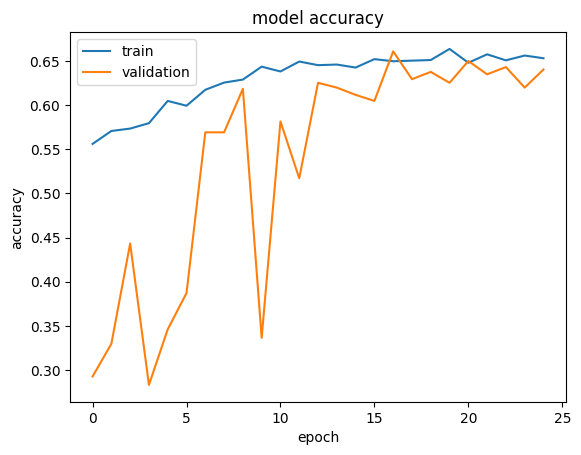

In [ ]:
def unfreeze_model(model):
    for layer in model.layers[-50:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-6),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-8)
unfreeze_model(model)
hist = model.fit(train_data, epochs=epochs, validation_data=validation_data, callbacks=[reduce_lr])
plot_hist(hist)